In [ ]:
import keras

In [ ]:
!apt-get install p7zip-full
!unzip -q  kagglecatsanddogs_5340.zip
#IMPORTING LIBRARIES
import numpy as np 
import pandas as pd
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A


In [ ]:
#IMPORTING DATASET

img = []
label = []
for i in os.listdir("PetImages"):
  for j in os.listdir("PetImages/"+i):
    if i ==  "Cat":
      label.append(0)
    else:
      label.append(1)
    img.append(os.path.join("PetImages",i,j)) 


In [ ]:
#CREATING DATAFRAME
img_df = pd.DataFrame(img)
img_label = pd.DataFrame(label)
df = pd.concat([img_df,img_label],axis=1)
df.columns = ["Image","Label"]
df.head(10)


,Image,Label
0,PetImages/Dog/3889.jpg,1
1,PetImages/Dog/7220.jpg,1
2,PetImages/Dog/151.jpg,1
3,PetImages/Dog/4715.jpg,1
4,PetImages/Dog/7339.jpg,1
5,PetImages/Dog/5344.jpg,1
6,PetImages/Dog/11424.jpg,1
7,PetImages/Dog/8596.jpg,1
8,PetImages/Dog/11391.jpg,1
9,PetImages/Dog/10909.jpg,1


In [ ]:
#DELETING THE FILES WHICH IS NOT AN IMAGE
import PIL
worng = []
for i in df["Image"]:
    try:
        img = PIL.Image.open(i)
    except:
        worng.append(i)
for i in worng:
  df.drop(df[df["Image"] == i].index )



/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Image    12501
Label    12501
dtype: int64

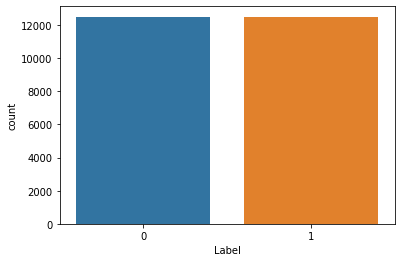

In [ ]:
# VISUALIZING WEIGHT
import seaborn as sns
sns.countplot(df["Label"])


In [ ]:

#RESIZE
for index,link in enumerate(df["Image"]):
    images = Image.open(link)
    images = images.resize((200,200),Image.ANTIALIAS)

    dir_path = "/content/resi"
    if index in range(0,12502):
      name = "Dog_"+str(index)+".jpg"
    elif index in range(12501,25001):
      name="Cat_"+str(index)+".jpg"
    file_path = os.path.join( dir_path, name  ) 
    images.convert('RGB').save( file_path )

   


UnidentifiedImageError: ignored

In [ ]:
files = os.listdir("/content/resi")
print(files)
img_path_list = []
for f in files:
    if f.endswith(".jpg"): 
        img_path_list.append(f)



['151.jpg', '1518.jpg', '1869.jpg', '1157.jpg', '2194.jpg', '2081.jpg', '1460.jpg', '808.jpg', '1722.jpg', '1070.jpg', '752.jpg', '726.jpg', '1011.jpg', '1551.jpg', '964.jpg', '1087.jpg', '183.jpg', '1242.jpg', '1295.jpg', '1553.jpg', '733.jpg', '459.jpg', '1808.jpg', '689.jpg', '1790.jpg', '2096.jpg', '982.jpg', '454.jpg', '2137.jpg', '2238.jpg', '734.jpg', '1500.jpg', '946.jpg', '1547.jpg', '1140.jpg', '1557.jpg', '1450.jpg', '958.jpg', '2151.jpg', '1349.jpg', '113.jpg', '1835.jpg', '1887.jpg', '1578.jpg', '816.jpg', '59.jpg', '53.jpg', '1205.jpg', '767.jpg', '20.jpg', '2174.jpg', '1575.jpg', '1619.jpg', '196.jpg', '894.jpg', '516.jpg', '577.jpg', '1475.jpg', '350.jpg', '1000.jpg', '1285.jpg', '1060.jpg', '193.jpg', '368.jpg', '1083.jpg', '1814.jpg', '1388.jpg', '1756.jpg', '1628.jpg', '426.jpg', '727.jpg', '2220.jpg', '1625.jpg', '1491.jpg', '2249.jpg', '69.jpg', '552.jpg', '1993.jpg', '496.jpg', '1995.jpg', '264.jpg', '616.jpg', '437.jpg', '1813.jpg', '1768.jpg', '1178.jpg', '1077.

1229.jpg


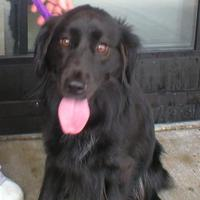

1459.jpg


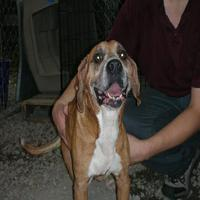

91.jpg


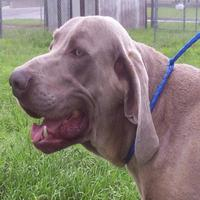

1607.jpg


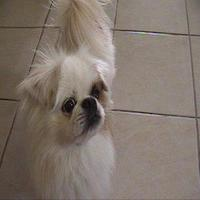

1356.jpg


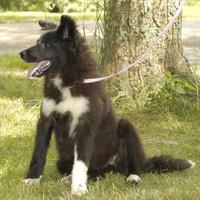

In [ ]:
#DATA VISUALIZATION
import random
from google.colab.patches import cv2_imshow
for i in range(0,5):
  number=random.randint(0,1000)
  rimg=img_path_list[number]
  print(rimg)
  image=cv2.imread("/content/resi/"+rimg)
  cv2_imshow(image)

In [ ]:
#MODELIZATION
from sklearn.model_selection import train_test_split

df['Label'] = df['Label'].astype('str')
train,test = train_test_split(df,test_size=0.33,random_state=5)
train.head()


,Image,Label
3232,PetImages/Dog/5370.jpg,1
3505,PetImages/Dog/4356.jpg,1
2005,PetImages/Dog/10623.jpg,1
2167,PetImages/Dog/4950.jpg,1
11223,PetImages/Dog/9519.jpg,1


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  
    rotation_range = 40, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='Image', 
    y_col='Label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='Image', 
    y_col='Label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)
test_images = val_generator.flow_from_dataframe(
    dataframe=df,
    x_col='Image',
    y_col='Label',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 16750 validated image filenames belonging to 2 classes.
Found 8250 validated image filenames belonging to 2 classes.
Found 25000 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
#TRAIN AND SCORE SCORE
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
print("-----------------------------------------------------------------------")
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 64)      

UnidentifiedImageError: ignored

In [ ]:
#HEATMAP
from sklearn.metrics import confusion_matrix, classification_report
pred = (model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, pred, labels=[0, 1])
clr = classification_report(test_images.labels, pred, labels=[0, 1])
                        
LABELS=["Cat", "Dog"]

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["Cat", "Dog"])
plt.yticks(ticks=[0.5, 1.5], labels=["Cat", "Dog"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
score = history.history['accuracy']
val_score = history.history['val_accuracy']
epochs = range(len(score))

plt.plot(epochs, score, 'b', label='Training Accuracy')
plt.plot(epochs, val_score, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()